###  Desafio 🚀
---

Nesse desafio, será realizada a leitura do arquivo de estatísticas da Loja Google (googleplaystore.csv) a fim de processar seus dados e gerar gráficos para análises.  Para seu desenvolvimento, estarei utilizando as bibliotecas Pandas e Matplotlib, além disso, também seguirei uma sequência de ações nas quais estarei detalhando um pouco mais sobre os códigos que usei para execução dos passos.

Análise inicial
__________________________________________________________________________________________________
Inicialmente importei as bibliotecas Pandas, que será usada para carregar, manipular e tratar os dados, e Matplotlib, que será usada para criar gráficos. Para ler o arquivo e armazená-lo no DataFrame (df), utilizei a biblioteca Pandas e fiz a análise inicial dos dados.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


- Fazendo a leitura do arquivo e armazenando no DataFrame:

In [72]:
df = pd.read_csv('googleplaystore.csv')


- Visualizando melhor as primeiras linhas para entender um pouco mais sobre as colunas e como os dados estão organizados:

In [73]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Conhecendo as dimensões do DataFrame:

In [9]:
df.shape

(10841, 13)

- Informações da base (tipos de dados, linhas não nulas, número de entradas):

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- Verificando quantos valores únicos existem em cada coluna:

In [13]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

- Visualizando os valores vazios:

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Etapa 1
__________________________________________________________________________________________________
Após a análise inicial dos dados e compreendendo um pouco mais sobre a nossa base seguirei com as etapas solicitadas no desafio, inicialmente é pedido a remoção de linhas duplicadas. Para isso, utilizarei a função df.drop_duplicates() que remove linhas duplicadas em um DataFrame.

In [74]:
df = df.drop_duplicates()

Etapa 2
__________________________________________________________________________________________________
Nessa etapa, é pedido um gráfico de barras contendo os top 5 apps por número de instalações. No entanto, na primeira tentativa de rodar o código foi observado que na coluna Installs existia uma linha que continha valor não numérico, com a palavra "Free" que provavelmente ocorreu por erro no preenchimento. Assim, seria necessário conversar com o time de negócio para verificar a importância dessa linha na análise final ou se pode ser excluída. Para fins do exercício eu estarei filtrando apenas as os valores válidos na coluna, utilizei a função str.contains() e passei o padrão dos valores, também usei o argumento na=False para ignorar valores nulos.

Em seguida, por meio do str.replace() removi os sinais de vírgula e +, o que permitiu a conversão para inteiro, assim, é possível fazer a ordenação posteriormente.

In [75]:
df = df[df['Installs'].str.contains(r'^\d+[,\d]*\+$', na=False)]

In [76]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

Para elaboração do gráfico primeiramente fiz a ordenação do top 5 intalações, onde usei a função sort_values() com o parâmetro ascending=False para ficar de forma decrescente e head(5) para selecionar o top 5. Quanto ao gráfico, defini uma paleta de cores com  códigos hexadecimais, criei uma figura com tamanho ajustado, por meio da função plt.bar() gerei o gráfico de barras verticais, incluí o título do gráfico com plt.title(), fiz a definição dos rótulos dos eixos x e y e, para melhorar a visualização dos nomes dos apps, girei o rótulo em 30°. Finalizei ajustando automaticamente o layout e pedindo para exibir.

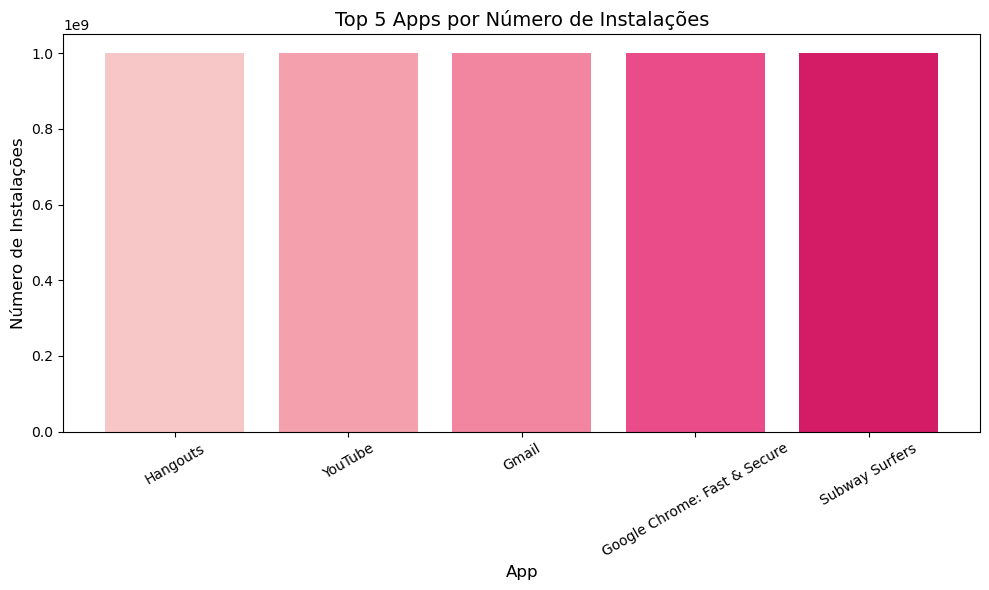

In [77]:
top5_installs = df.sort_values(by='Installs', ascending=False).head(5)

colors = ['#f7c6c7', '#f4a1ad', '#f285a0', '#ea4c89', '#d41c66']
plt.figure(figsize=(10,6))
bars = plt.bar(top5_installs['App'], top5_installs['Installs'], color=colors)
plt.title('Top 5 Apps por Número de Instalações', fontsize=14)
plt.xlabel('App', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Etapa 3
__________________________________________________________________________________________________
Nessa etapa, pede-se para fazer um gráfico de pizza mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem. Na primeira vez que fiz a construção do gráfico achei um pouco poluído visualmente, assim, fiz um outro gráfico selecionando as top 4 categorias por frequência e classificando o que sobrou como 'others' como uma forma de deixar mais limpo a visualização. Dessa forma, entregaria os dois gráficos para o time de negócios e eles avaliariam qual seria mais interessante naquele momento.

Para construção do gráfico, primeiramente utilizei o método value_counts() para contar a frequência de cada categoria presente na coluna Category. Em seguida, defini o tamanho da figura e com a função plt.pie() para criei um gráfico de pizza com as 10 categorias mais frequentes, depois coloquei o título e pedi para exibir o resultado.

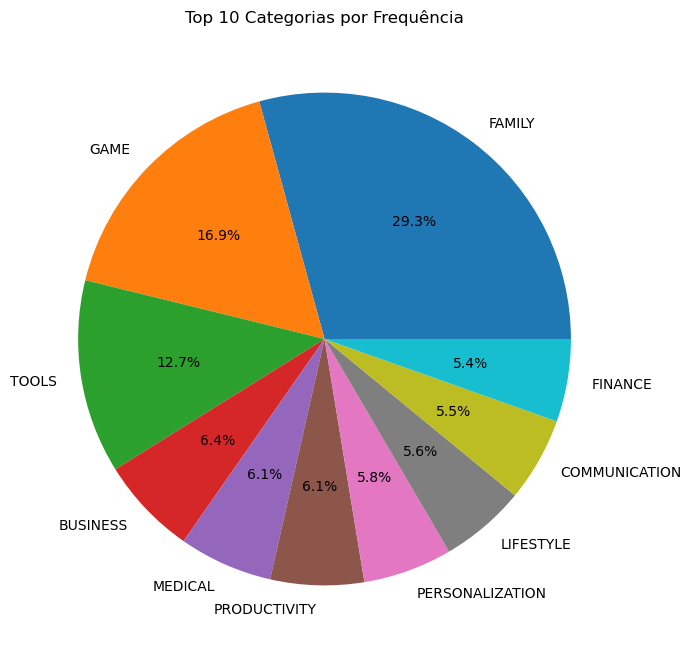

In [78]:
frequencia_categoria = df['Category'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(frequencia_categoria.head(10), labels=frequencia_categoria.head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Categorias por Frequência')
plt.show()

Para construção desse segundo gráfico, selecionei as 4 categorias mais frequentes com fatiamento e para as outras categorias  que sobraram somei os valores restantes e armazenei na variável others, depois fiz a concatenação desse top 4 com others. 
Para visualização do gráfico defini uma paleta azul associando uma cor para cada fatia, utilizei plt.pie() para criar o gráfico de pizza e configurei os rótulos, cores, porcentagens automaticas, ângulo de início do gráfico, além de ajustar a fonte e o layout final.

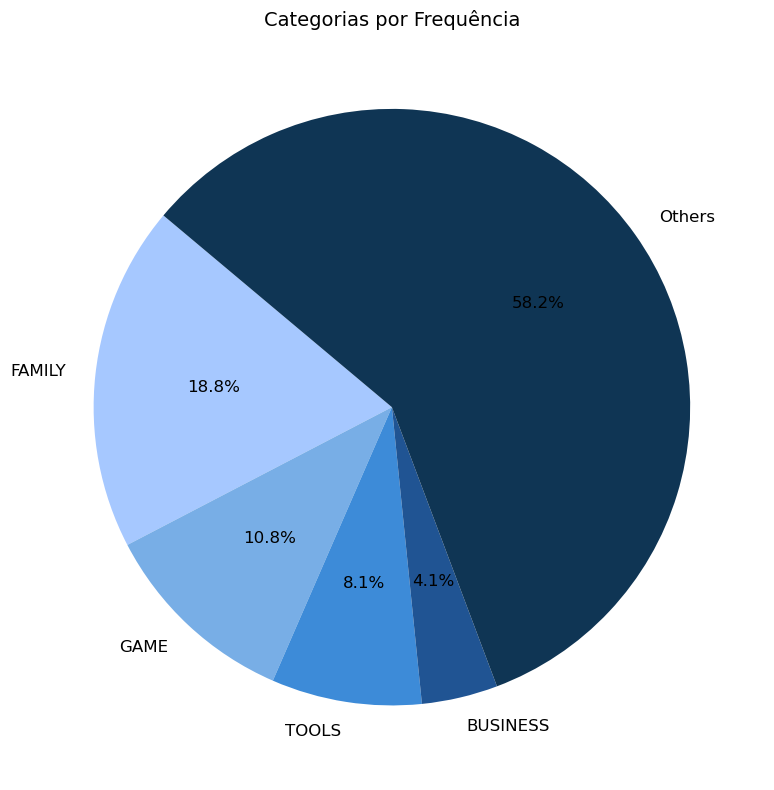

In [79]:
top4 = frequencia_categoria[:4]
others = frequencia_categoria[4:].sum()
concat = pd.concat([top4, pd.Series({'Others': others})])

colors = ['#a6c8ff', '#78aee6', '#3d8bd8', '#205493', '#0f3554']
plt.figure(figsize=(8, 8))
plt.pie(concat, labels=concat.index, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.title('Categorias por Frequência', fontsize=14)
plt.tight_layout()
plt.show()

Etapa 4
__________________________________________________________________________________________________
Nessa etapa é solicitado mostrar o app mais caro existente no DataFrame. Para resolução dessa questão será utilizada a coluna Price, observando o formato dos valores dessa coluna vi que possuíam o $, assim, impediria que a coluna fosse tratada como numérica. Dessa forma, usei str.replace() para remover o símbolo e transformei os valores em números. Depois, usei uma filtragem condicional para localizar o app com o maior valor no DataFrame, finalizei com a exibição das colunas App e Price.

In [80]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

top1_preco = df[df['Price'] == df['Price'].max()]
top1_preco[['App', 'Price']]

,App,Price
4367,I'm Rich - Trump Edition,400.0


Etapa 5
__________________________________________________________________________________________________
É pedido para mostrar quantos apps são classificados como 'Mature 17+*. Para essa questão filtrei o DataFrame para selecionar apenas as linhas onde a coluna Content Rating é igual a Mature 17+. Depois, usei .shape[0] para contar quantas linhas existem nesse novo DataFrame, o que equivale à quantidade de apps com essa classificação. 

In [83]:
apps_mature_17 = df[df['Content Rating'] == 'Mature 17+']
total_mature_17 = apps_mature_17.shape[0]

print(f'Total de Apps classificados como Mature 17+: {total_mature_17}')

Total de Apps classificados como Mature 17+: 447


Etapa 6
__________________________________________________________________________________________________
É solicitado o top 10 apps por número de reviews bem como o respectivo número, além de ordenar a lista de forma decrescente por número de reviews. Primeiramente converti a coluna Reviews para valores numéricos, uma vez que antes era do tipo object, usei também o argumento errors='coerce' para transformar em NaN os registros que não puderem ser convertidos. Em seguida, ordenei o DataFrame pela coluna Reviews, em ordem decrescente e selecionei os 10 primeiros registros da lista ordenada, finalizei exibindo as colunas App e Reviews.


In [84]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

top10_reviews = df.sort_values(by='Reviews', ascending=False).head(10)
top10_reviews[['App', 'Reviews']]

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


Etapa 7
__________________________________________________________________________________________________
É solicitado a criação de pelo menos mais 2 cálculos sobre o dataset e apresentar um em formato de lista e outro em formato de valor.

Top 10 apps gratuitos com maior número de instalações: 

Comecei a questão filtrando apenas os aplicativos gratuitos no DataFrame original, utilizei drop_duplicates() para remover registros duplicados com base no nome do app, para que cada aplicativo apareça apenas uma vez na análise. Após isso, ordenei os apps pelo número de instalações de forma decrescente e selecionei os 10 primeiros registros. Por fim, exibi as colunas App e Installs para apresentar os resultados.

In [96]:
apps_gratuitos = df[df['Price'] == 0.0]
apps_gratuitos_unicos = apps_gratuitos.drop_duplicates(subset='App')
top10_apps_gratuitos_inst = apps_gratuitos_unicos.sort_values(by='Installs', ascending=False).head(10)
top10_apps_gratuitos_inst[['App', 'Installs']]

,App,Installs
3117,Maps - Navigate & Explore,1000000000
2545,Instagram,1000000000
152,Google Play Books,1000000000
2554,Google+,1000000000
2544,Facebook,1000000000
3127,Google Street View,1000000000
865,Google Play Games,1000000000
3736,Google News,1000000000
3687,Google Play Movies & TV,1000000000
3665,YouTube,1000000000


top 10 categorias com mais apps gratuitos:

Para resolução dessa questão usei a mesma variável da questão anterior (apps_gratuitos). Para contar quantos apps gratuitos existem em cada categoria utilizei value_counts() sobre a coluna Category e selecionei apenas as 10 categorias com mais ocorrências. Por fim, exibi diretamente o  resultado, que mostra as categorias e as respectivas quantidades de apps gratuitos.



In [92]:
top_categorias_gratis = apps_gratuitos['Category'].value_counts().head(10)
top_categorias_gratis

Category
FAMILY           1755
GAME             1038
TOOLS             765
BUSINESS          415
PRODUCTIVITY      379
LIFESTYLE         354
FINANCE           343
COMMUNICATION     339
SPORTS            327
MEDICAL           324
Name: count, dtype: int64

Média das notas dos apps gratuitos:

Utilizei a mesma variável usada anteriormente (apps_gratuitos), assim, calculei a média das notas por meio do .mean() na coluna Rating e arredondei o valor resultante para duas casas decimais com a função round(). 

In [99]:
media_rating_gratis = round(apps_gratuitos['Rating'].mean(), 2)
media_rating_gratis

4.18

Etapa 8
__________________________________________________________________________________________________
Nessa etapa é solicitado a elaboração de pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca Matplotlib.

Distribuição das Notas dos Apps Gratuitos:

Este gráfico (histograma) mostra a distribuição das notas dos apps gratuitos, permitindo visualizar como as avaliações estão distribuídas. Para sua construção, inicialmente utilizei a função plt.figure() para definir o tamanho do gráfico. Considerando a elaboração do histograma, usei a função plt.hist() e passei a coluna Rating dos apps gratuitos como base, definindo 20 faixas de agrupamento. Depois, ajustei as cores da barra, contorno, os rótulos dos eixos, o título principal e finalizei ajustando o layout com plt.tight_layout() para evitar sobreposição de elementos e exibi o gráfico.



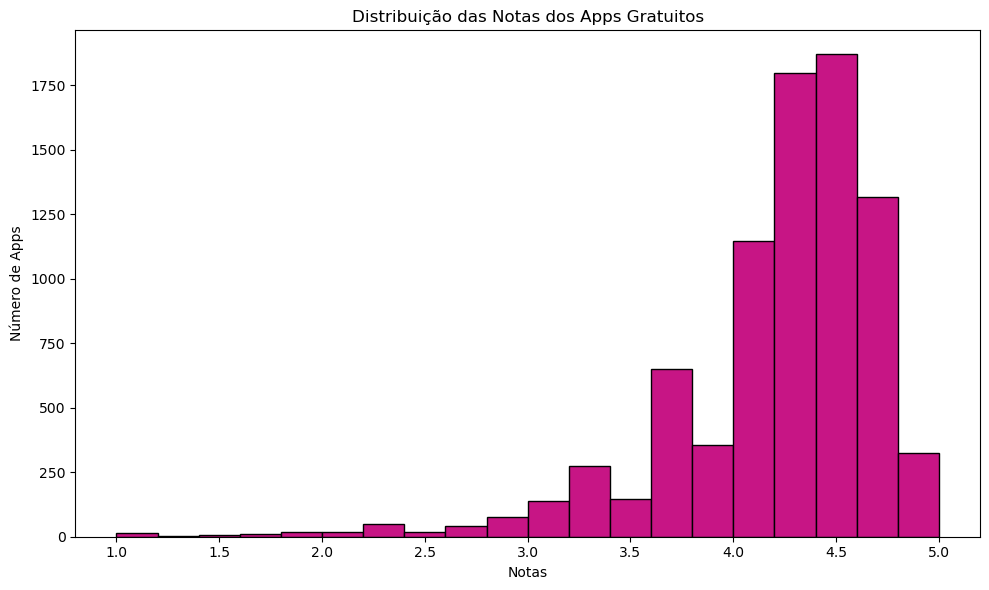

In [109]:
plt.figure(figsize=(10,6))
plt.hist(apps_gratuitos['Rating'], bins=20, color='mediumvioletred', edgecolor='black')
plt.xlabel('Notas')
plt.ylabel('Número de Apps')
plt.title('Distribuição das Notas dos Apps Gratuitos')
plt.tight_layout()
plt.show()

Relação entre Avaliações e Notas dos Apps Gratuitos:

Esse gráfico (dispersão) permite visualizar a relação entre o número de avaliações e a nota média dos apps gratuitos. Assim poderemos analisar se apps com muitas avaliações tendem a ter notas mais altas ou mais baixas, se há algum padrão entre popularidade e qualidade percebida, se existem outliers, dentre outros. Para construção desse gráfico utilizei a função plt.scatter() para criar um gráfico de dispersão, para o eixo X coloquei o número de Reviews e, no eixo Y, as notas médias dos apps gratuitos. Além disso, utilizei a função plt.xscale('log'), que aplica escala logarítmica no eixo X, já que o número de avaliações varia muito entre os apps, adicionei um nível de transparência para facilitar a visualização de sobreposição de pontos e adicionei uma grade ao fundo com plt.grid() para facilitar a leitura dos valores. Finalizei com título e rótulos nos eixos, e por fim, exibi o gráfico.

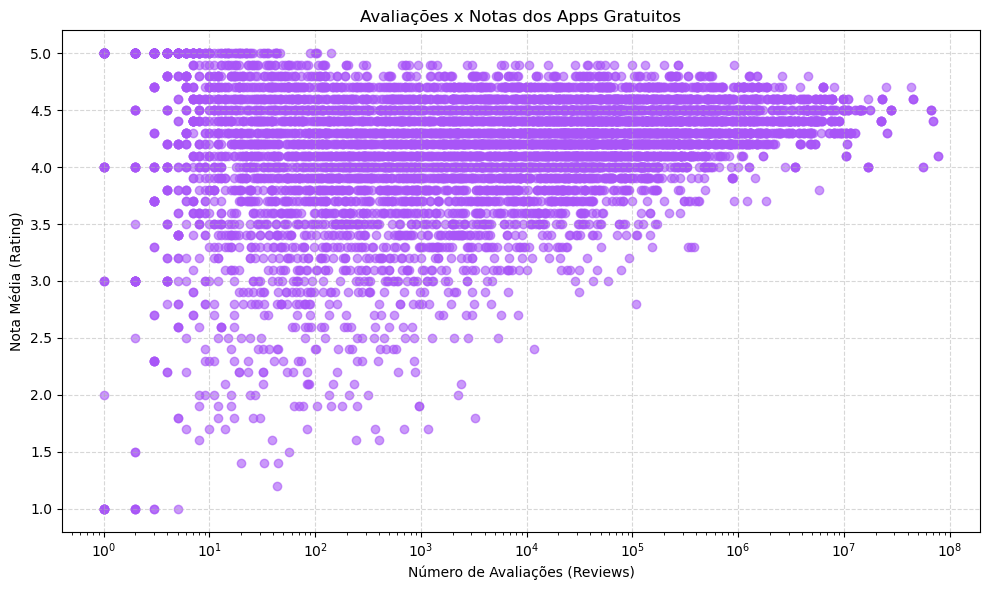

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(apps_gratuitos['Reviews'], apps_gratuitos['Rating'], alpha=0.6, color='#a855f7')
plt.xlabel('Número de Avaliações')
plt.ylabel('Nota Média')
plt.title('Avaliações x Notas dos Apps Gratuitos')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()